# Exploratory Data Analysis (EDA)

In [61]:
import os
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from collections import Counter
from tensorflow.keras.preprocessing import image
import numpy as np
import random

I will gather information about the dataset, including the labels (classes) and the sizes of the images. I will also analyze the distribution of the classes and the sizes of the images.

In [49]:
dataset_dir = 'image-classifier/data/animals'

def get_data_info(dataset_dir):
    labels = []
    image_sizes = []
    image_formats = []

    for label in os.listdir(dataset_dir):
        class_dir = os.path.join(dataset_dir, label)
        if os.path.isdir(class_dir):
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)

                try:
                    img = image.load_img(img_path)
                    image_sizes.append(img.size)
                    labels.append(label)
                    image_formats.append(img.format)
                except Exception as e:
                    print(f'Error loading image {img_path}: {e}')

    return labels, image_sizes, image_formats


# Gather data information
labels, image_sizes, image_formats = get_data_info(dataset_dir)

## Analysis of distribution of classes

In [63]:
label_counts = Counter(labels)
print(f'Distribution of classes: {label_counts}')


df = pd.DataFrame(label_counts.items(), columns=['Class', 'Count'])

fig = px.bar(df, 
             x='Count', 
             y='Class', 
             orientation='h',  
             title='Distribution of Animal Classes', 
             labels={'Count': 'Number of Images', 'Class': 'Animal Class'},
             template='plotly_dark')

fig.update_traces(marker_color='#008891', marker_line_color='rgb(8,48,107)')
fig.show()


Distribution of classes: Counter({'antelope': 60, 'badger': 60, 'bat': 60, 'bear': 60, 'bee': 60, 'beetle': 60, 'bison': 60, 'boar': 60, 'butterfly': 60, 'cat': 60, 'caterpillar': 60, 'chimpanzee': 60, 'cockroach': 60, 'cow': 60, 'coyote': 60, 'crab': 60, 'crow': 60, 'deer': 60, 'dog': 60, 'dolphin': 60, 'donkey': 60, 'dragonfly': 60, 'duck': 60, 'eagle': 60, 'elephant': 60, 'flamingo': 60, 'fly': 60, 'fox': 60, 'goat': 60, 'goldfish': 60, 'goose': 60, 'gorilla': 60, 'grasshopper': 60, 'hamster': 60, 'hare': 60, 'hedgehog': 60, 'hippopotamus': 60, 'hornbill': 60, 'horse': 60, 'hummingbird': 60, 'hyena': 60, 'jellyfish': 60, 'kangaroo': 60, 'koala': 60, 'ladybugs': 60, 'leopard': 60, 'lion': 60, 'lizard': 60, 'lobster': 60, 'mosquito': 60, 'moth': 60, 'mouse': 60, 'octopus': 60, 'okapi': 60, 'orangutan': 60, 'otter': 60, 'owl': 60, 'ox': 60, 'oyster': 60, 'panda': 60, 'parrot': 60, 'pelecaniformes': 60, 'penguin': 60, 'pig': 60, 'pigeon': 60, 'porcupine': 60, 'possum': 60, 'raccoon': 60

The dataset is balanced, with each class having the same number of images (60).  

## Analysis of image sizes

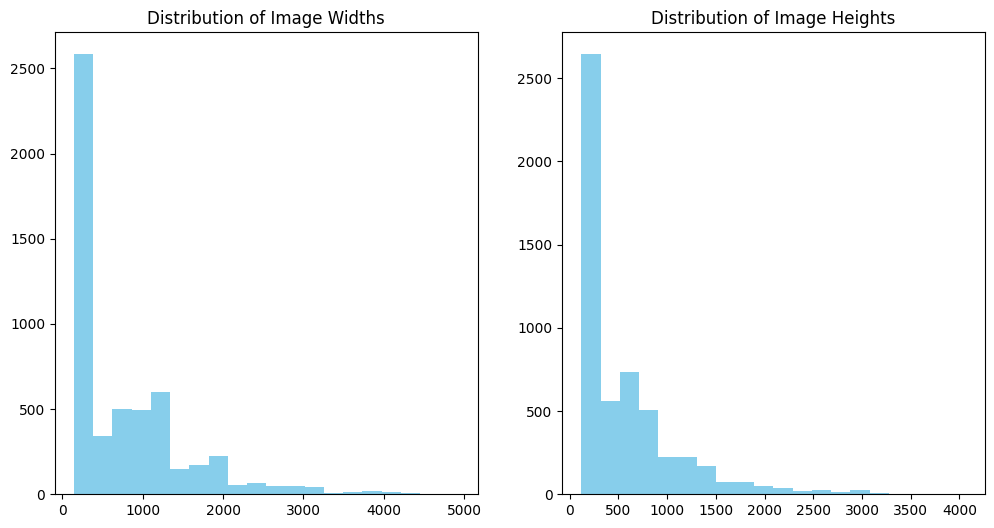

In [32]:
image_widths = [size[0] for size in image_sizes]
image_heights = [size[1] for size in image_sizes]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(image_widths, bins=20, color='skyblue')
plt.title('Distribution of Image Widths')
plt.subplot(1, 2, 2)
plt.hist(image_heights, bins=20, color='skyblue')
plt.title('Distribution of Image Heights')
plt.show()

The histograms show the distribution of image widths and heights, with most images having relatively small dimensions. There is a significant concentration of images with widths and heights below 1000 pixels, while a smaller number of images have larger dimensions. The distributions are right-skewed, indicating that a few images have exceptionally large sizes compared to the majority.

## Analysis of empty images

In [33]:
# Check for empty images
empty_images = [img for img in image_sizes if img == (0, 0)]
print(f'Number of empty images: {len(empty_images)}')

Number of empty images: 0


## Display random images from multiple classes

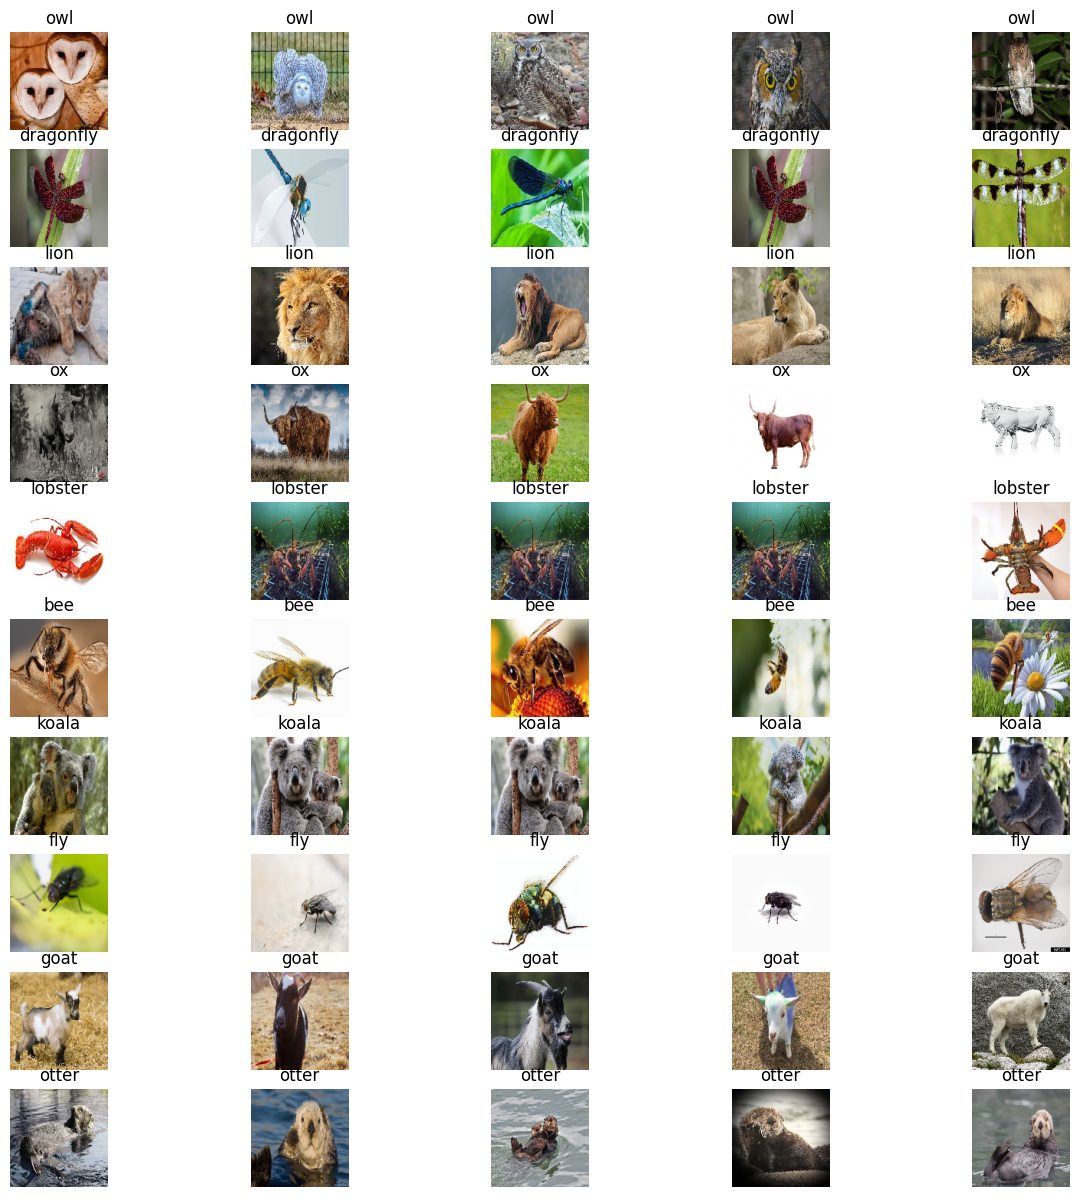

In [37]:
def plot_images_of_classes(dataset_dir, target_classes, n=5):
    fig, axes = plt.subplots(len(target_classes), n, figsize=(15, 15))
    for i, target_class in enumerate(target_classes):
        class_dir = os.path.join(dataset_dir, target_class)
        class_images = os.listdir(class_dir)
        for j in range(n):
            rand_idx = np.random.randint(0, len(class_images))
            img_path = os.path.join(class_dir, class_images[rand_idx])
            img = image.load_img(img_path, target_size=(128, 128))
            ax = axes[i, j]
            ax.imshow(img)
            ax.set_title(target_class)
            ax.axis('off')
    plt.show()


random_classes = random.sample(list(label_counts.keys()), 10)
plot_images_of_classes(dataset_dir, random_classes)

## Brightness, Contrast, and Color Channel Analysis

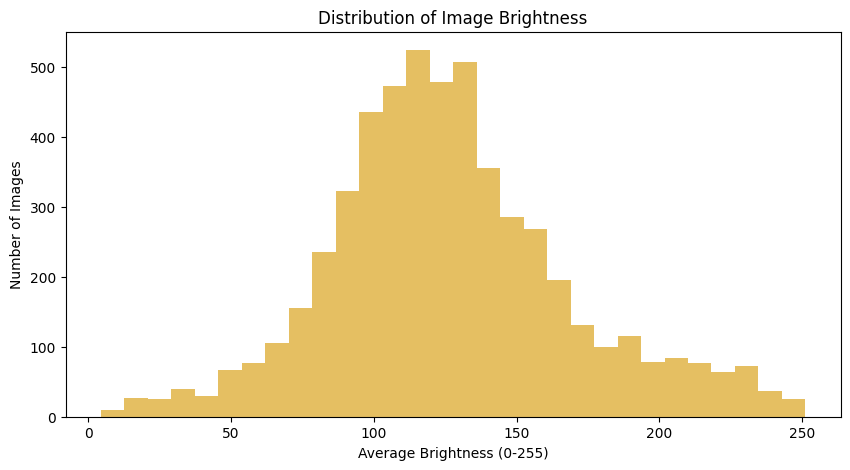

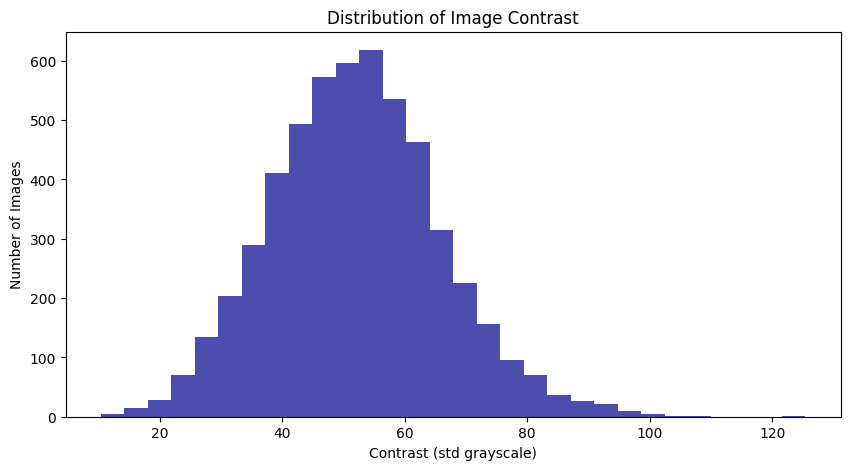

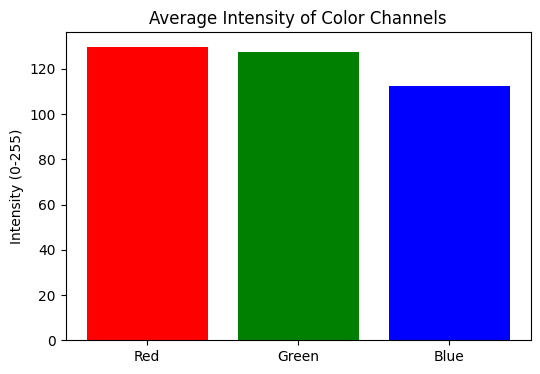

In [51]:
from PIL import Image

brightness_values = []
contrast_values = []
rgb_means = []


def calculate_contrast(image):
    img_array = np.array(image.convert('L'))
    return img_array.std()


for label in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, label)
    if os.path.isdir(class_dir):
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)

            try:
                img = Image.open(img_path)

                # Brightness
                img_gray = img.convert('L')
                brightness_values.append(np.array(img_gray).mean())

                # Contrast
                contrast_values.append(calculate_contrast(img))

                # Mean value of color channels
                img_rgb = np.array(img)
                if len(img_rgb.shape) == 3:  # Check if the image is colored
                    r_mean = img_rgb[:, :, 0].mean()
                    g_mean = img_rgb[:, :, 1].mean()
                    b_mean = img_rgb[:, :, 2].mean()
                else:
                    r_mean = g_mean = b_mean = img_rgb.mean()  # Grayscale image

                rgb_means.append((r_mean, g_mean, b_mean))

            except Exception as e:
                print(f'Error reading {img_path}: {e}')

# 🔹 Brightness visualization
plt.figure(figsize=(10, 5))
plt.hist(brightness_values, bins=30, color='goldenrod', alpha=0.7)
plt.xlabel('Average Brightness (0-255)')
plt.ylabel('Number of Images')
plt.title('Distribution of Image Brightness')
plt.show()

# 🔹 Contrast visualization
plt.figure(figsize=(10, 5))
plt.hist(contrast_values, bins=30, color='darkblue', alpha=0.7)
plt.xlabel('Contrast (std grayscale)')
plt.ylabel('Number of Images')
plt.title('Distribution of Image Contrast')
plt.show()

# 🔹 Analysis of color channels (mean values)
rgb_means = np.array(rgb_means)
r_mean, g_mean, b_mean = rgb_means.mean(axis=0)

# Visualization of mean channel values
plt.figure(figsize=(6, 4))
plt.bar(['Red', 'Green', 'Blue'], [r_mean, g_mean, b_mean], color=['red', 'green', 'blue'])
plt.title('Average Intensity of Color Channels')
plt.ylabel('Intensity (0-255)')
plt.show()

The brightness distribution histogram shows that most images have an average brightness between 80 and 160, indicating that the dataset contains predominantly well-lit images with some variation in illumination.
 
The contrast distribution follows a normal-like curve, with most images having contrast values between 40 and 70, suggesting a balanced range of sharpness and detail.
    
The bar chart of color channels reveals that red and green have similar average intensities, both higher than blue, implying that images in the dataset may have a warmer color tone overall. The presence of images with very low brightness and contrast suggests that some samples might be underexposed or poorly lit, which could affect model performance. The overall analysis indicates that while the dataset has a diverse range of images in terms of brightness and contrast, the dominance of red and green channels may introduce a slight color bias.

## Analysis of image formats

In [40]:
print(f'Formats of all images: {Counter(image_formats)}')

Formats of all images: Counter({'JPEG': 5400})


The dataset contains only JPEG images, which is a common format for image datasets. This information is useful for selecting appropriate image loading and preprocessing functions in the data pipeline.

## Summary

* Class Distribution: The dataset is balanced, with each class having the same number of images (60).  
* Image Sizes: The images have a diverse range of sizes, with most images having widths and heights between 100 and 500 pixels.  
* Brightness: Most images have an average brightness between 80 and 160, indicating that the dataset contains predominantly well-lit images with some variation in illumination.  
* Contrast: The contrast distribution follows a normal-like curve, with most images having contrast values between 40 and 70, suggesting a balanced range of sharpness and detail.  
* Color Channels: Red and green channels have similar average intensities, both higher than blue, implying that images in the dataset may have a warmer color tone overall. The presence of images with very low brightness and contrast suggests that some samples might be underexposed or poorly lit, which could affect model performance.  
* Image Formats: The dataset contains images in various formats, with the majority being JPEG.